In [1]:
from scipy.ndimage import rotate
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import cv2
import glob 
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
img_path = glob.glob('./KIMIA dataset/*.png')
img_path.sort() # sorting so that all the similar shape images saty togaether after manipulation
print(img_path) 
print(len(img_path))

['./KIMIA dataset/bonefishes.png', './KIMIA dataset/bonefishesocc1.png', './KIMIA dataset/bunny04.png', './KIMIA dataset/calf1.png', './KIMIA dataset/calf2.png', './KIMIA dataset/cat1.png', './KIMIA dataset/cat2.png', './KIMIA dataset/cow1.png', './KIMIA dataset/cow2.png', './KIMIA dataset/desertcottontail.png', './KIMIA dataset/dog1.png', './KIMIA dataset/dog2.png', './KIMIA dataset/dog3.png', './KIMIA dataset/dogfishsharks.png', './KIMIA dataset/donkey1.png', './KIMIA dataset/dude0.png', './KIMIA dataset/dude1.png', './KIMIA dataset/dude10.png', './KIMIA dataset/dude11.png', './KIMIA dataset/dude12.png', './KIMIA dataset/dude2.png', './KIMIA dataset/dude4.png', './KIMIA dataset/dude5.png', './KIMIA dataset/dude6.png', './KIMIA dataset/dude7.png', './KIMIA dataset/dude8.png', './KIMIA dataset/easterncottontail.png', './KIMIA dataset/f15.png', './KIMIA dataset/f16.png', './KIMIA dataset/f16occ1.png', './KIMIA dataset/fgen1ap.png', './KIMIA dataset/fgen1bp.png', './KIMIA dataset/fgen1ep

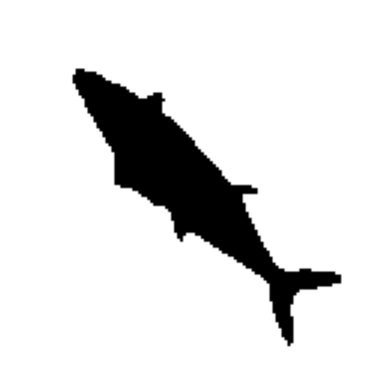

(124, 123)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [20]:
template_png = cv2.imread('./KIMIA dataset/fish14.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(template_png,cmap='gray')
plt.axis('off')
plt.show()
print(template_png.shape)
print(template_png)

In [27]:
X = np.array([np.where(template_png==0)])
# print(X)
X = X.reshape(X.shape[1], X.shape[2])
# print(X)
X = X.T
pca_template = PCA(n_components=2)
pca_template.fit(X)
template_angle = np.arctan2(pca_template.components_[0][1], pca_template.components_[0][0]) * 180 / np.pi
print('Template angle : ', template_angle)

Template angle :  44.423812780710044


-127.0288364344688


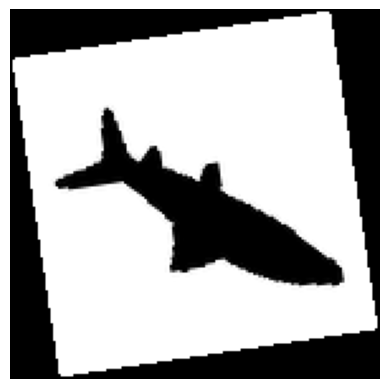

50.62945934731683


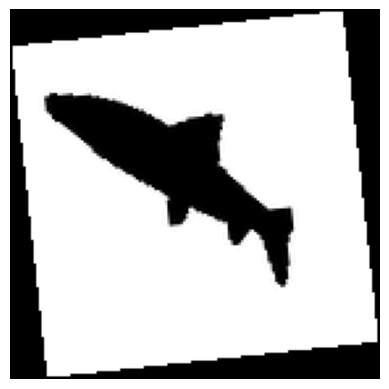

65.72052286966716


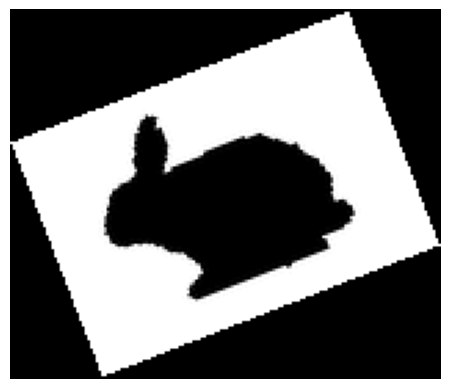

-108.97487551747508


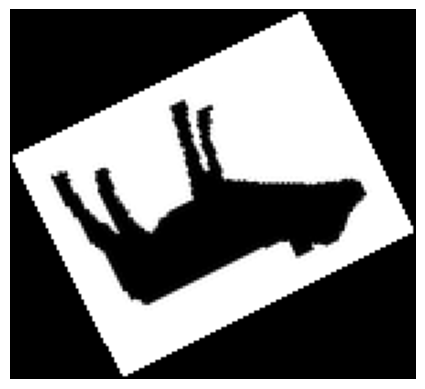

-109.789204859307


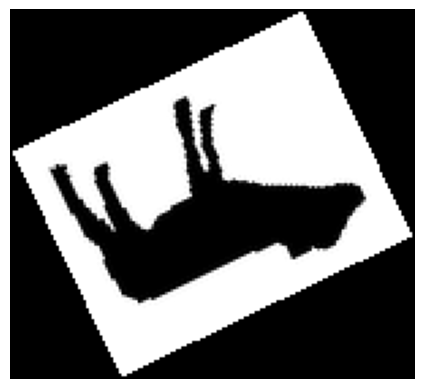

65.11226695733154


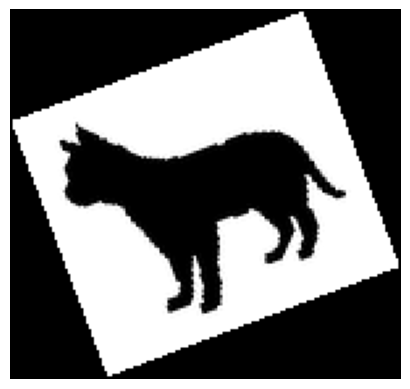

76.37671920430722


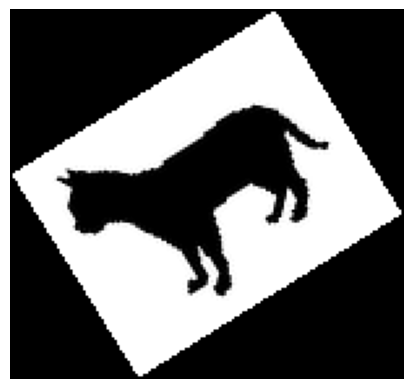

-115.6835547498461


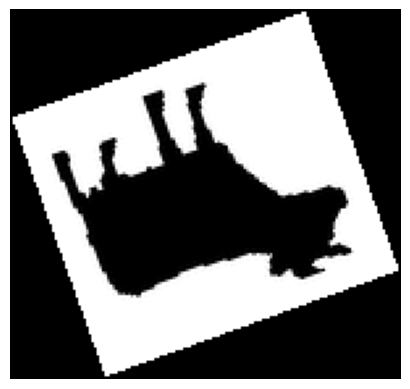

-102.19332571252461


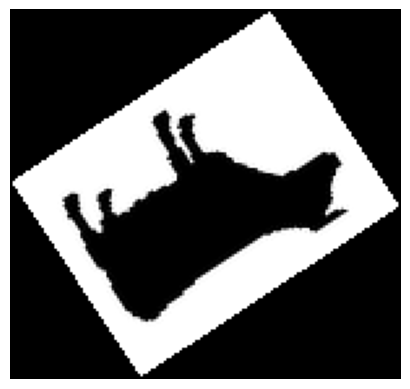

70.13976653429623


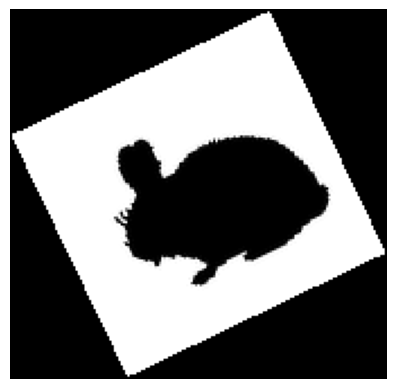

53.791446698611324


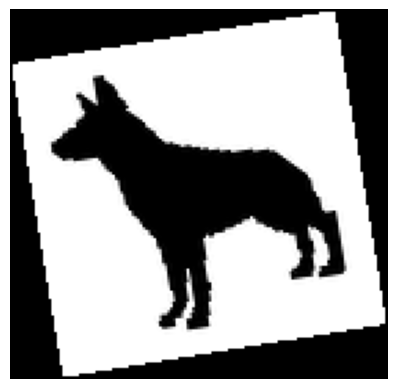

-86.11353719396845


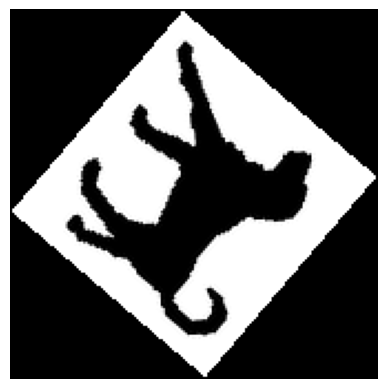

-84.68443877981916


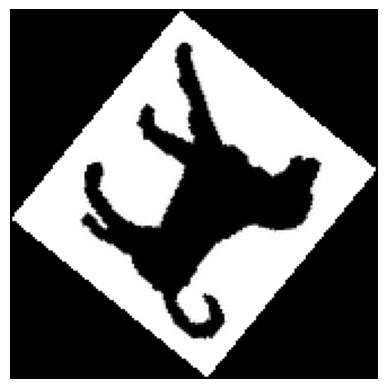

54.61272891975225


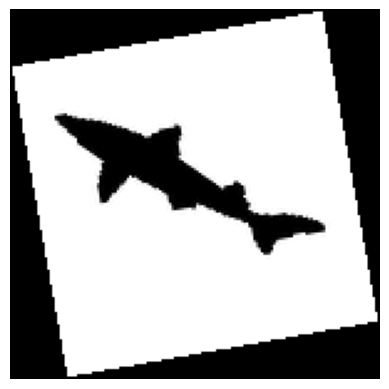

57.83043250921161


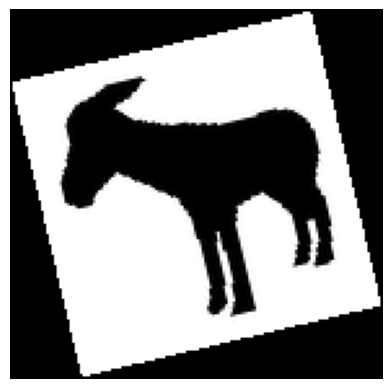

-3.507697187383551


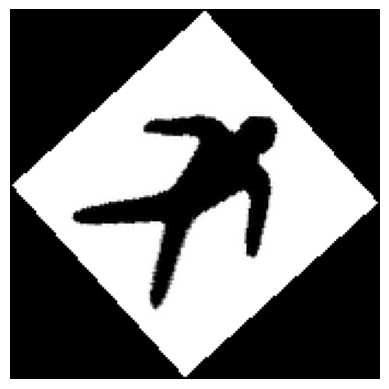

0.8211501609695855


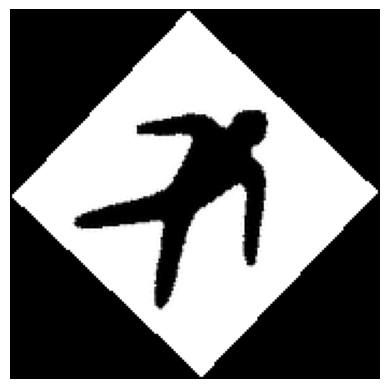

-19.886624805413327


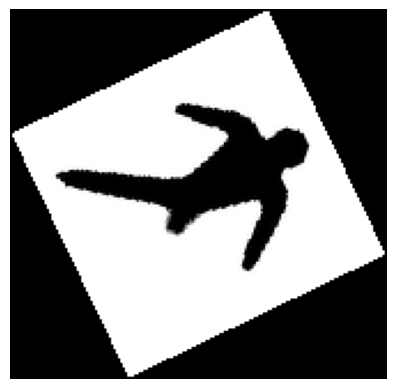

3.8155698518696246


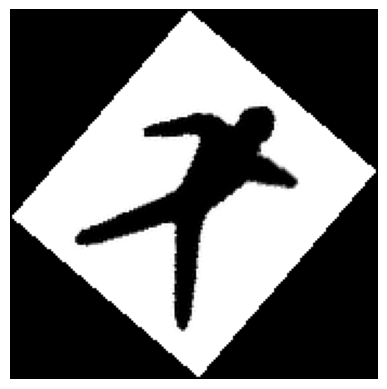

5.183751947044492


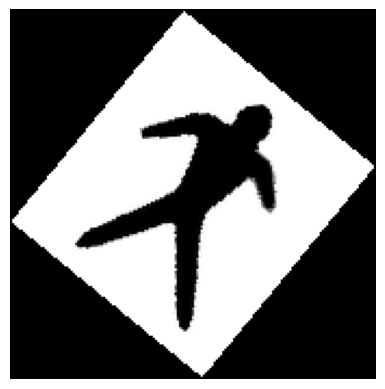

-10.909994281514646


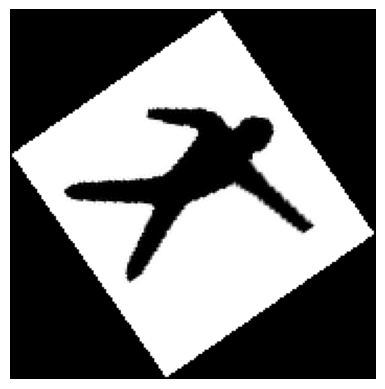

-6.993959358101082


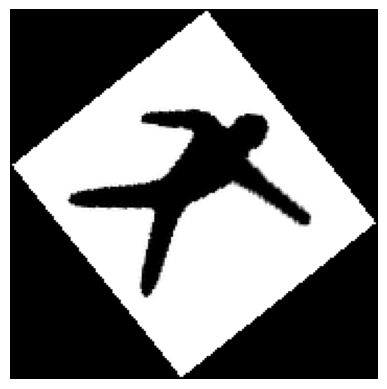

2.7790165165423515


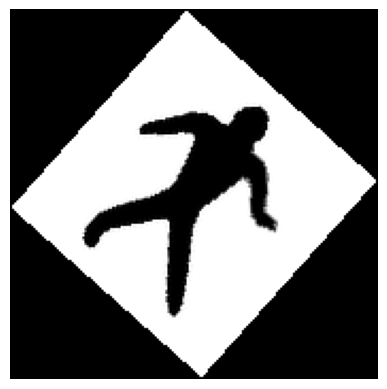

0.45715616614658566


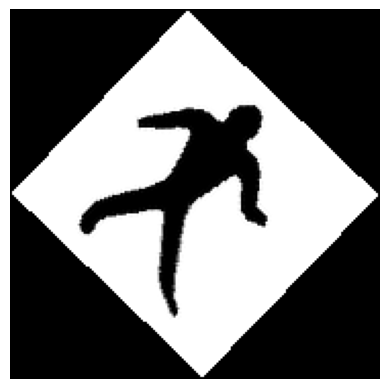

10.827313009198273


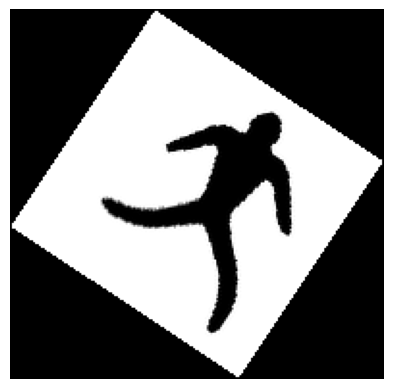

9.301090202654008


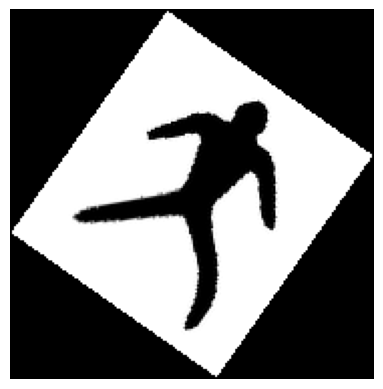

71.46895657282482


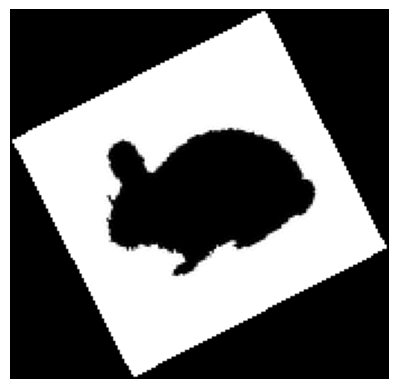

-36.18640237578069


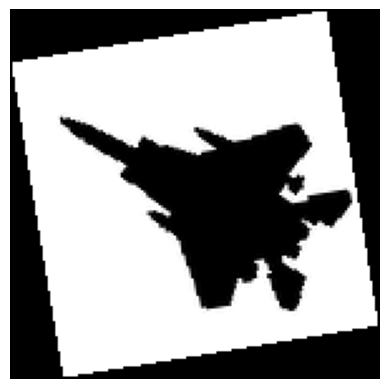

62.85137323303197


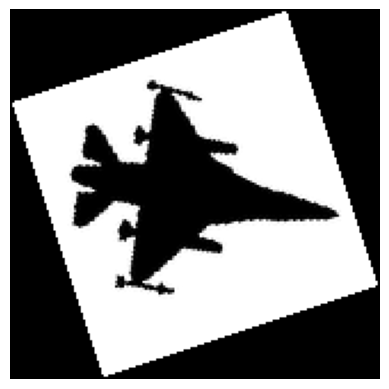

65.39221632264685


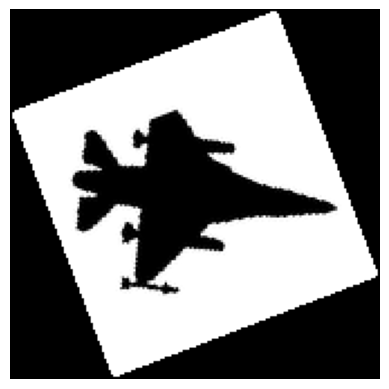

-2.8088512067873084


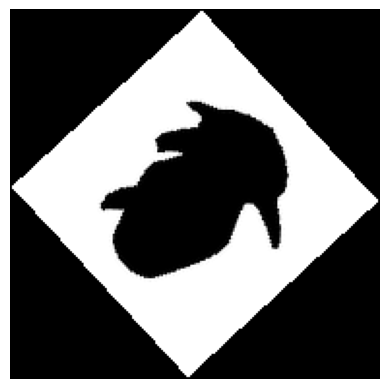

-1.3333294989425937


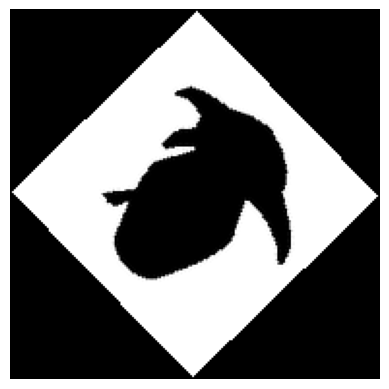

-4.325212228048035


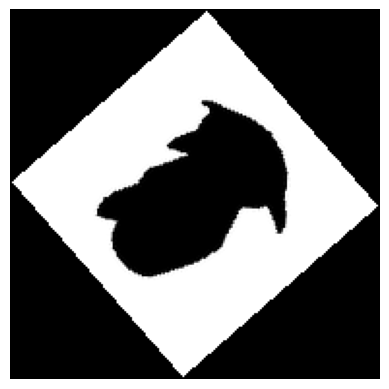

-4.259839777181189


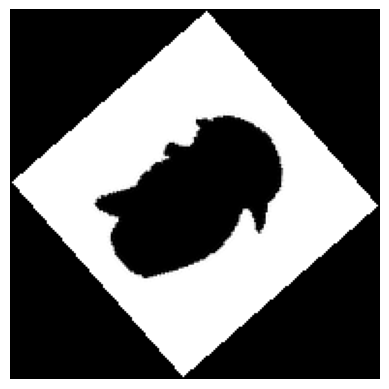

-1.8736867612283241


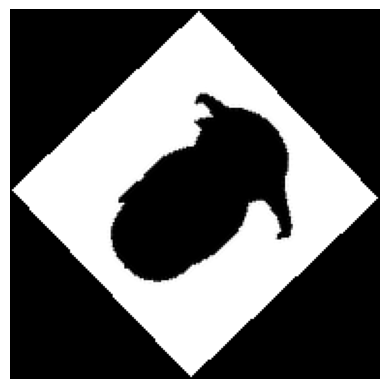

-3.0443191844779363


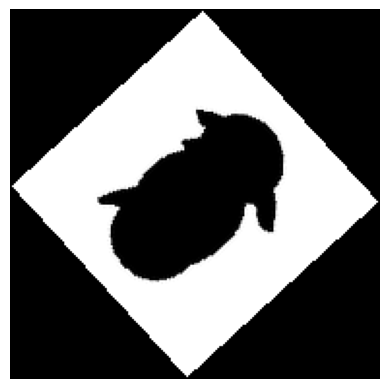

-3.313318861648592


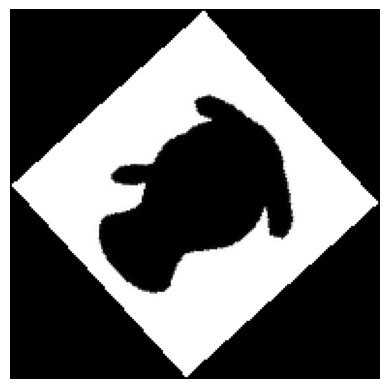

-3.9500432490232993


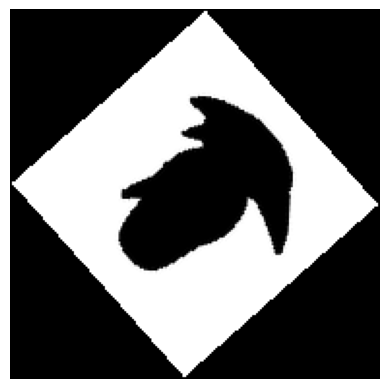

44.423812780710044


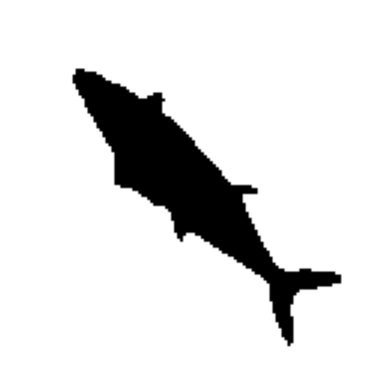

45.09558346683218


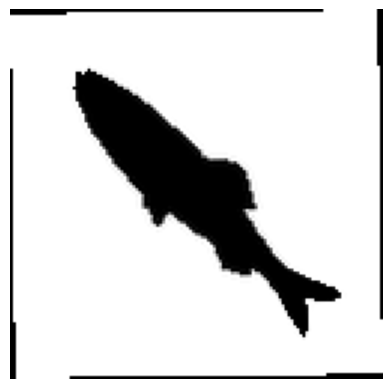

42.31484228682463


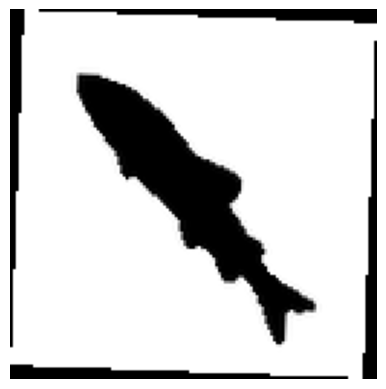

40.96265441926748


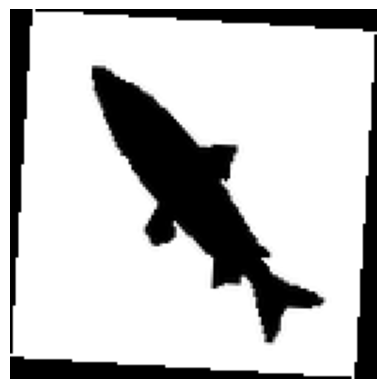

78.44636747539649


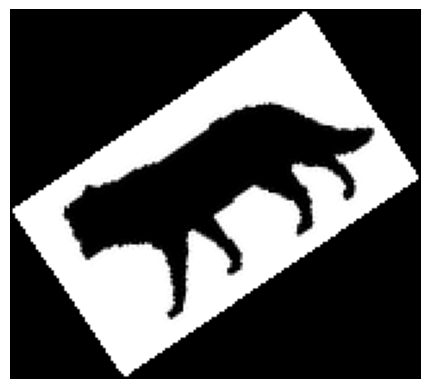

-175.0383791165023


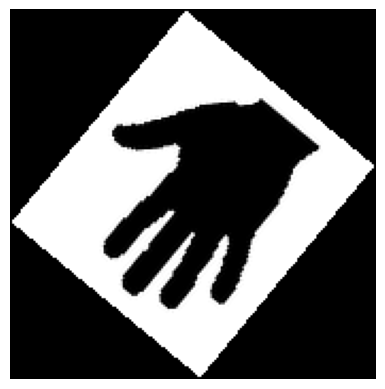

-148.80063721685391


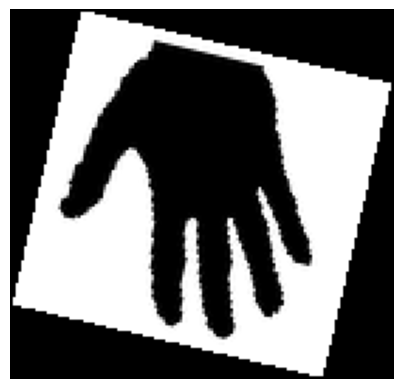

118.0614422934409


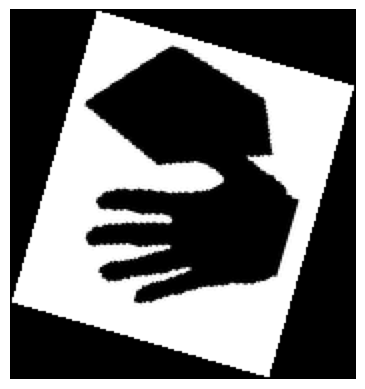

-123.95839808304349


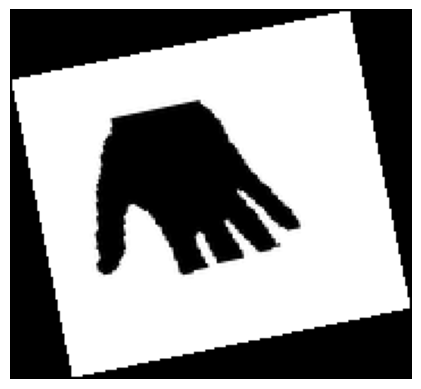

-160.18768671121063


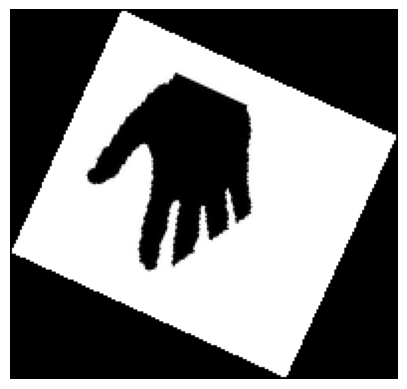

-59.04877763817716


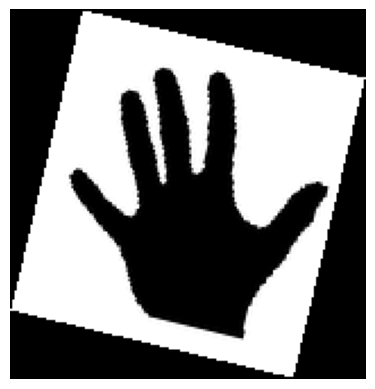

94.96162088349767


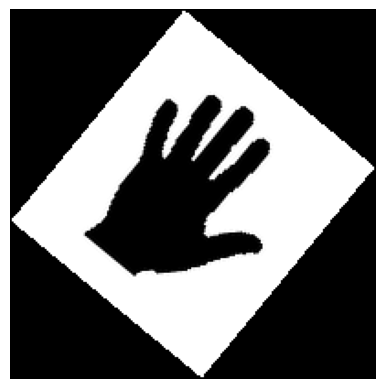

-174.90158638423753


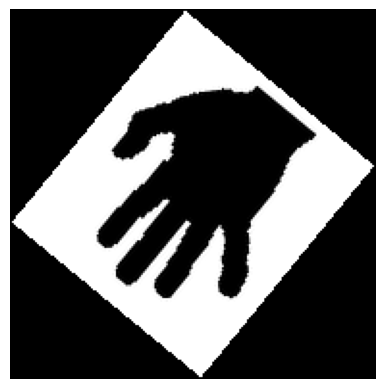

-174.7138108995244


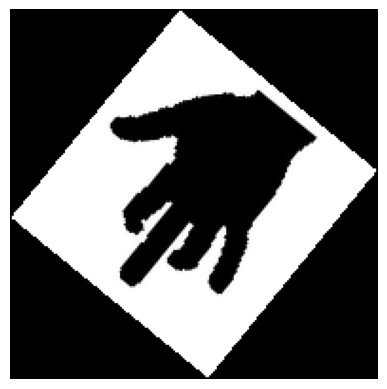

-171.55421896725267


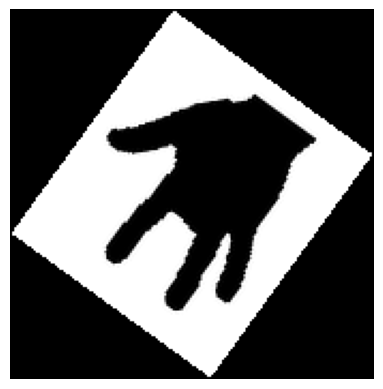

-85.64634526839308


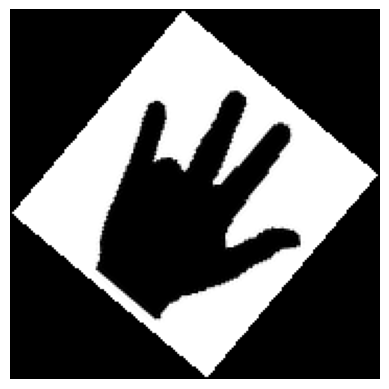

135.4529891350883


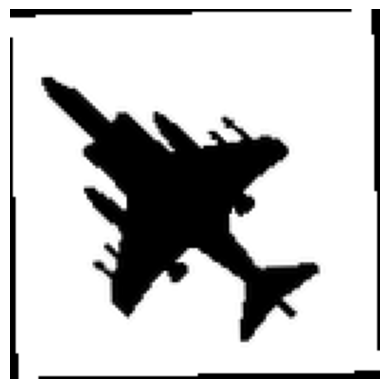

132.92434129059848


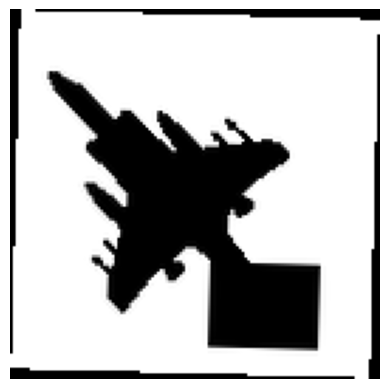

137.29652133260885


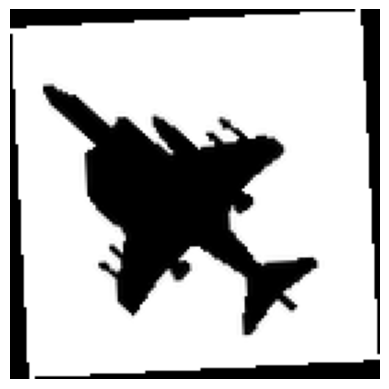

136.66889598833475


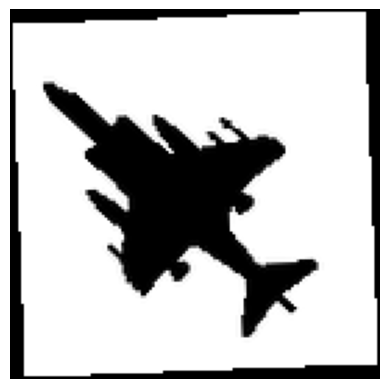

56.41234758112659


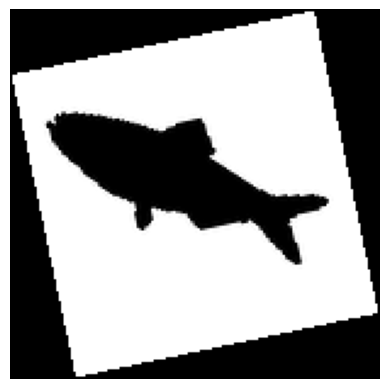

91.35802340586743


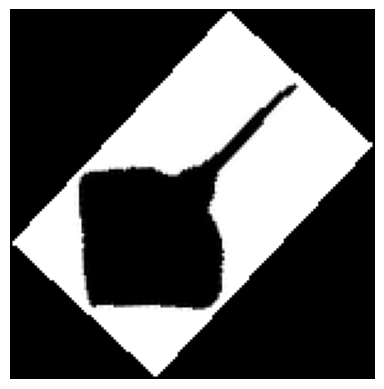

85.15245083201172


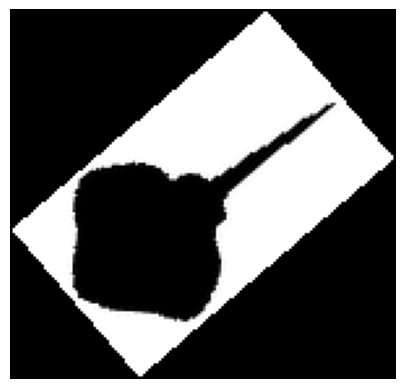

89.2250697837078


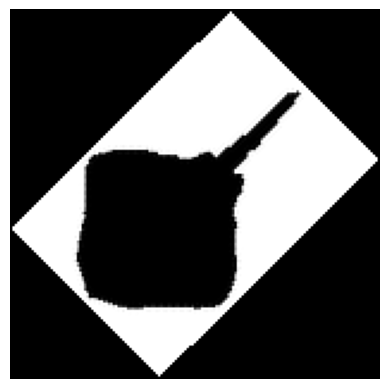

94.21475414277612


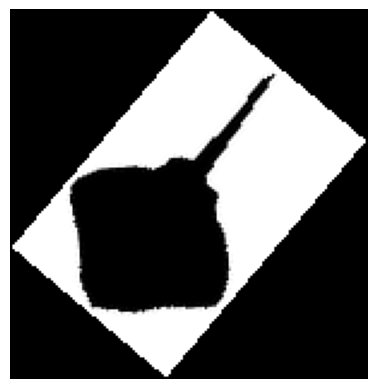

88.04054470270282


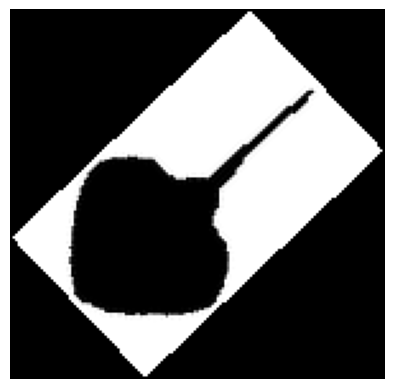

89.67955775069534


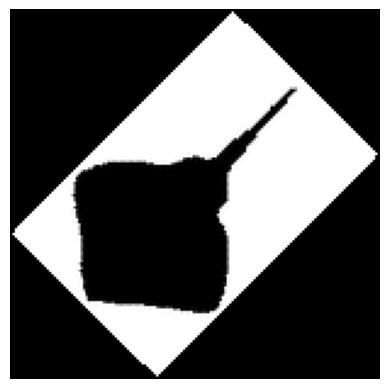

90.070908886338


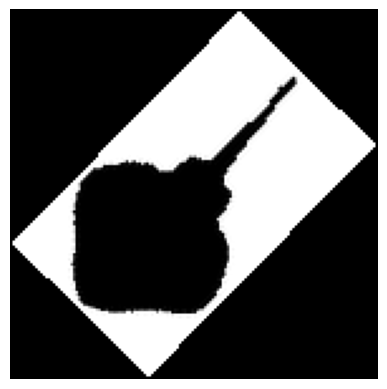

90.188716435981


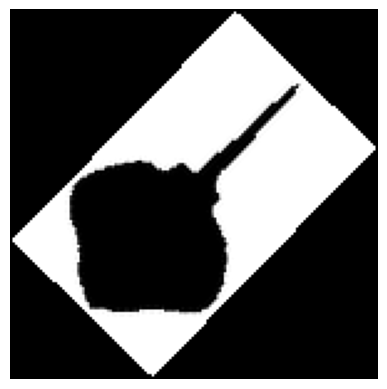

-17.642490710382457


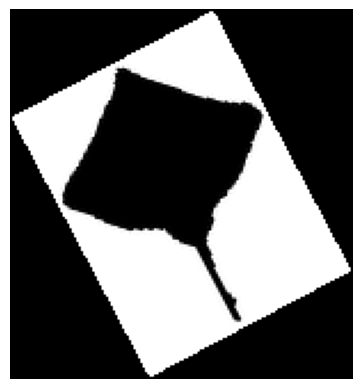

90.54654961822636


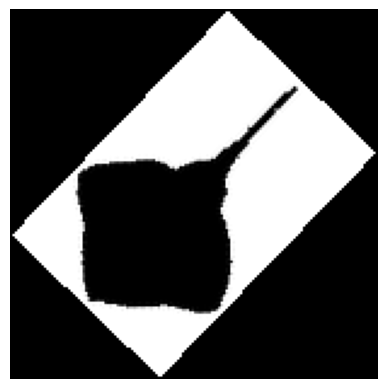

83.7114033982094


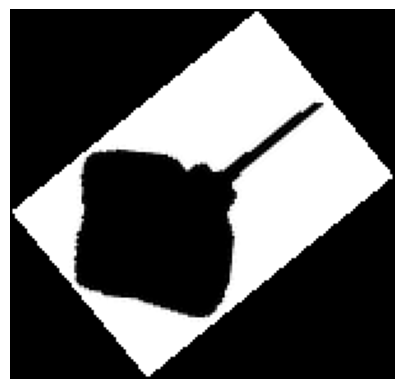

-106.40759113207713


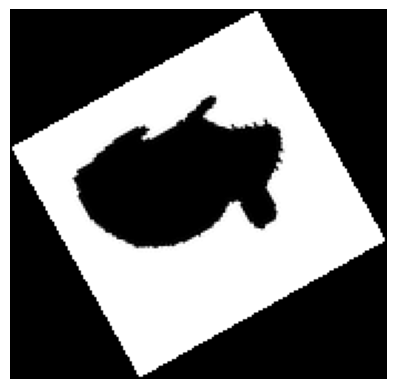

-5.124387539101008


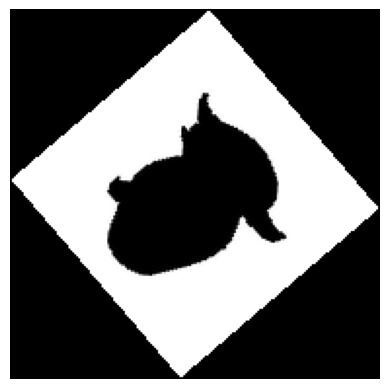

-3.615660133162754


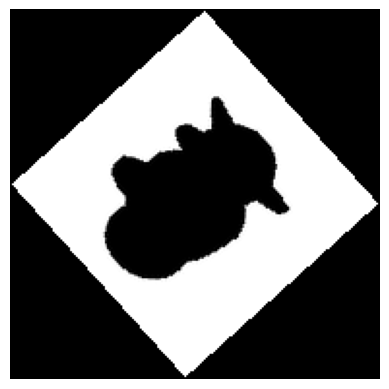

-4.1064380624537815


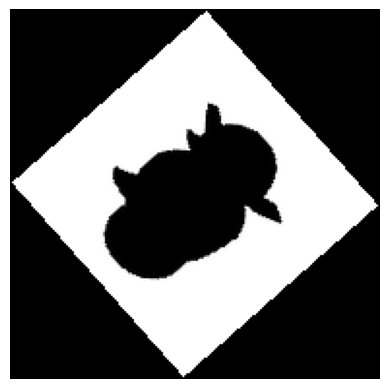

70.54728449413483


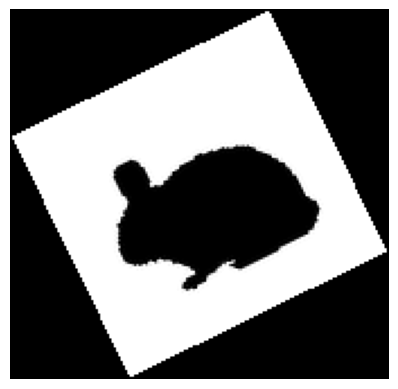

-102.97206696575743


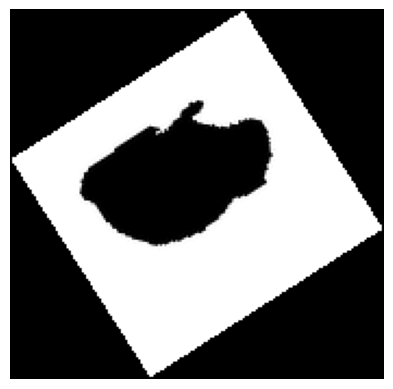

-97.46607375284664


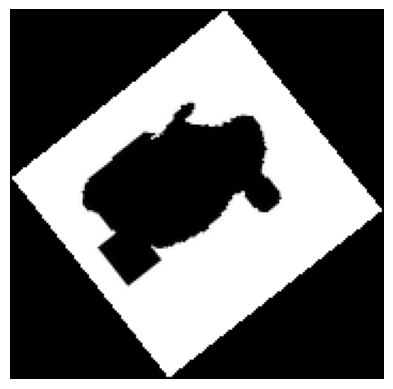

25.608415121318735


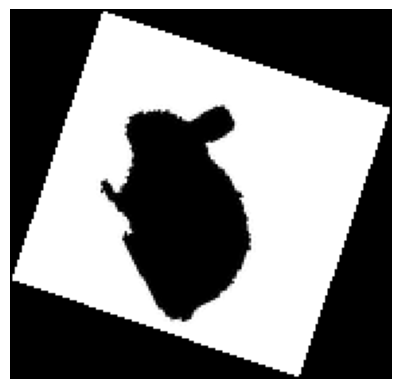

-124.82223264543535


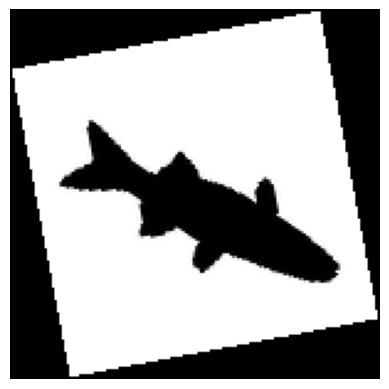

119.62527729134449


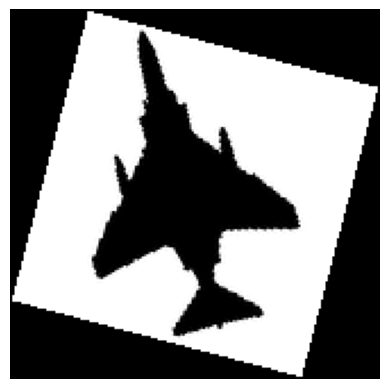

122.24741478745057


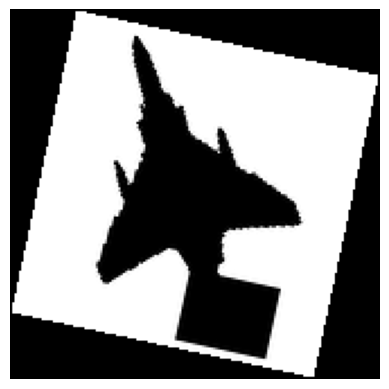

71.41516474084615


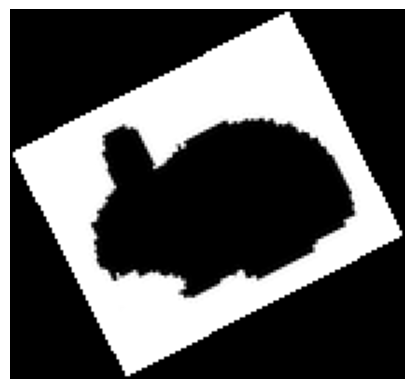

-68.82334257889853


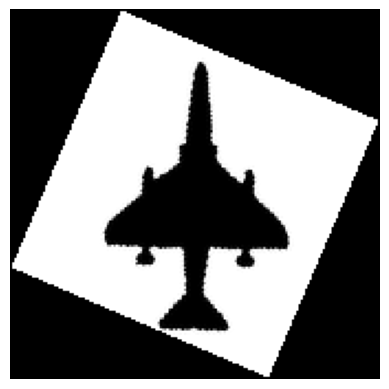

-67.83166381537416


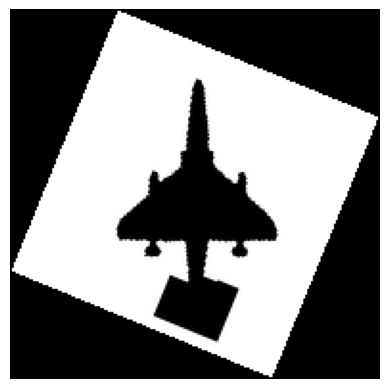

64.33706188933408


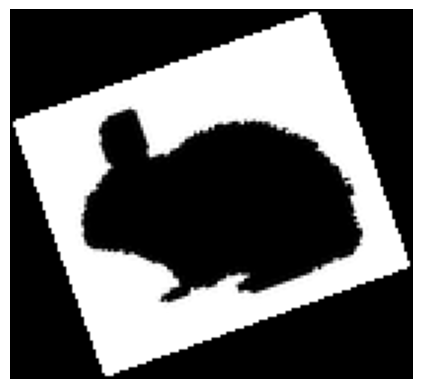

57.046476386549756


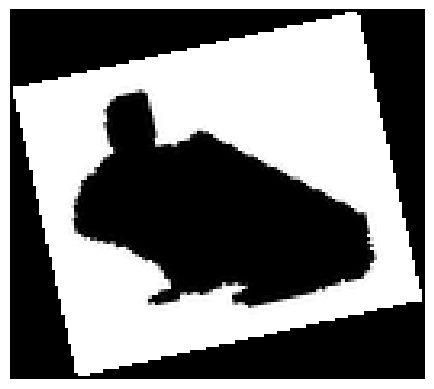

-126.49188522815088


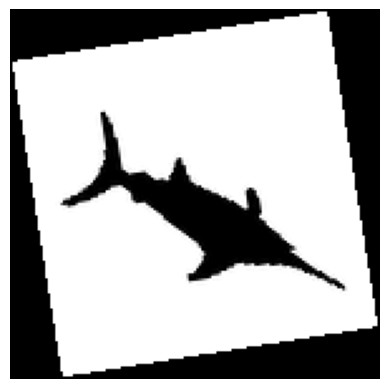

65.6624650671007


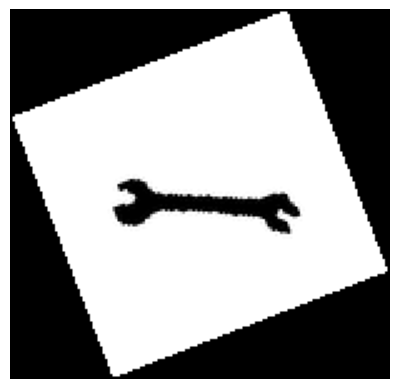

82.67610214567166


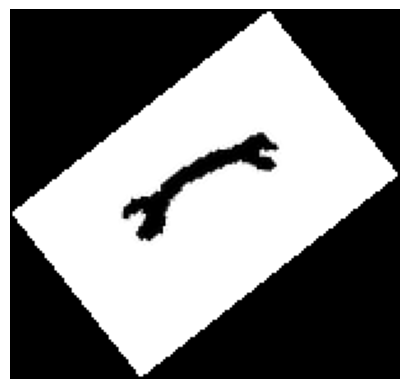

-57.84131233139621


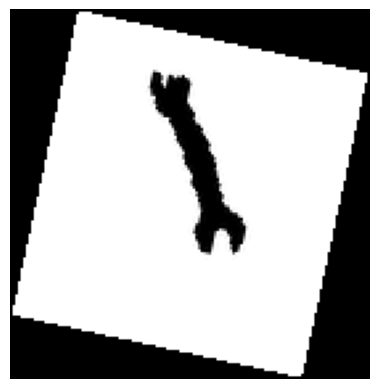

-87.15049712721714


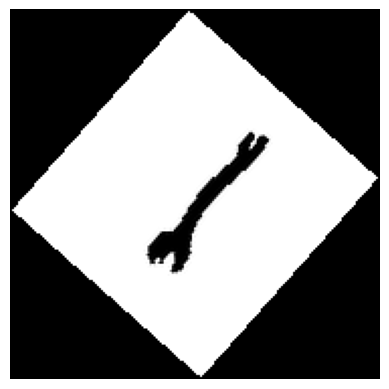

36.32243720766789


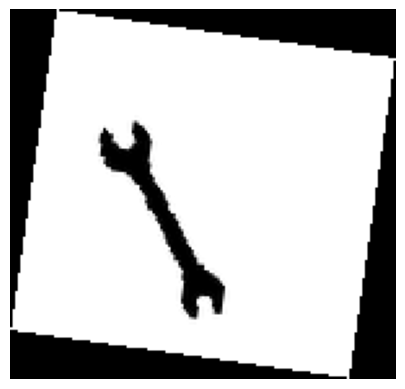

124.19213642183114


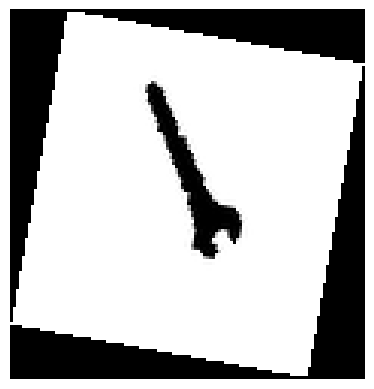

41.290176877890204


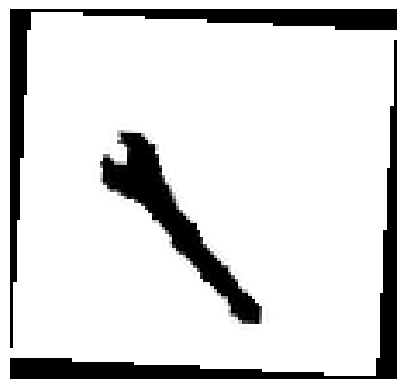

-147.1963531723336


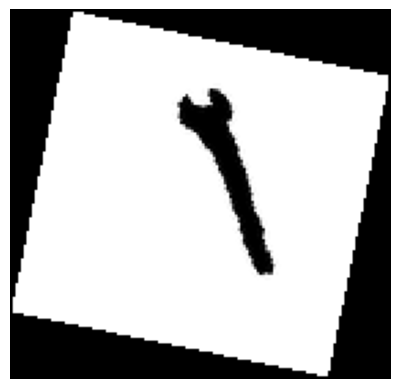

5.702861563334088


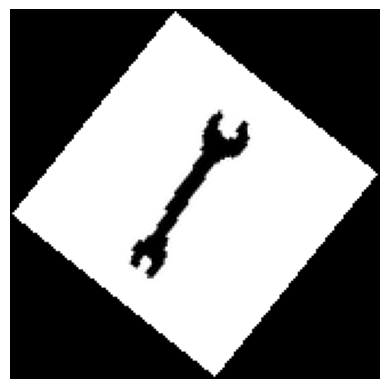

104.20143604378408


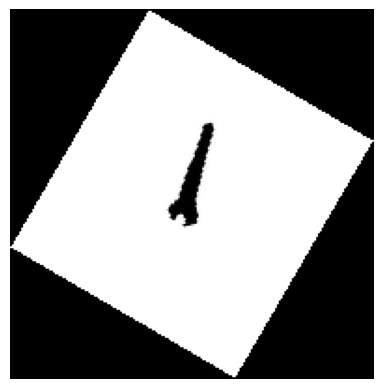

76.81568259605503


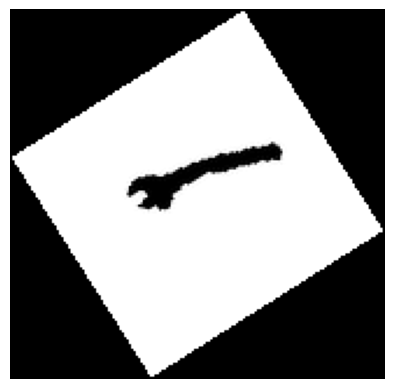

51.347796610335564


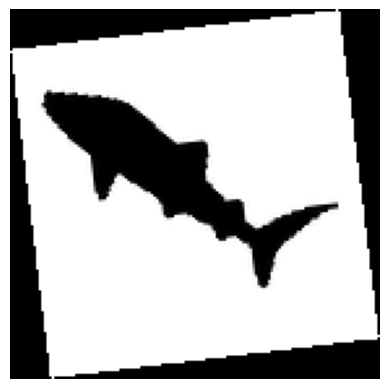

In [31]:
for path in img_path:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    X = np.array([np.where(img == 0)])
    X = X.reshape(X.shape[1], X.shape[2])
    X = X.T
    pca_img = PCA(n_components=2)
    pca_img.fit(X)
    pca_angle = np.arctan2(pca_img.components_[0][1], pca_img.components_[0][0]) * 180 / np.pi
    print(pca_angle)
    skew_angle = pca_angle - template_angle
    height, width = img.shape
    rotated_img = rotate(img, skew_angle)
    plt.imshow(rotated_img, cmap='gray')
    plt.axis('off')
    plt.show()

# FLOWCHART

1. PCA is done for the template image, after retrieving only the object to get it's alignment with the original axes.
2. For each sample image, the object is retrieved and it's angle is obtained from the original axes which is nothing but the slope of the PCA resultant.
2. Finally, the requisite rotation is being done which is the difference of the angle of the object and the angle of the template image.